In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load data
df = pd.read_csv(r"D:\AI\project\time_series_dataset24.csv")
df.head()

,PIN1,PTC,PDT1,PDT2,PGV1,PGV2,PGV3,PDT3,PDT4,Patm,...,FricTorque,Pin,Pdiff,GV,AGV,ATB1,ATB2,Group,Stage,Head
0,0.002862,0.001300,0.004675,0.004430,0.006501,0.005931,0.006195,0.020413,0.024108,6.285425,...,1.246962,6.118898,6.649683,2.636216,0.297385,-0.163528,0.224599,DPL,1,24
1,0.002862,0.001297,0.004674,0.004431,0.006519,0.005950,0.006197,0.020705,0.022757,6.291337,...,1.250575,6.142219,6.677930,2.635310,0.205243,-0.051941,0.307536,DPL,1,24
2,0.002862,0.001292,0.004673,0.004432,0.006524,0.005949,0.006208,0.021536,0.021985,6.287724,...,1.245649,6.096892,6.639173,2.634754,0.124694,-0.024502,0.252041,DPL,1,24
3,0.002863,0.001287,0.004673,0.004432,0.006537,0.005971,0.006211,0.021012,0.020271,6.283783,...,1.266670,6.125139,6.676617,2.634428,0.108219,-0.042185,0.274605,DPL,1,24
4,0.002865,0.001284,0.004673,0.004431,0.006531,0.005995,0.006229,0.019912,0.018715,6.288381,...,1.247619,6.032514,6.704535,2.634260,0.229651,-0.048283,0.203255,DPL,1,24


In [5]:
df = df.drop(['PIN1', 'PTC', 'WTmp','Head','Patm','rpm','Speed','Flow','Thrust','GenTorque','FricTorque','FricTorque','Pin','Pdiff','GV','AGV','Group','PDT2','PGV1','PGV3','PDT4'], axis=1)
print(df)

              PDT1      PGV2      PDT3      ATB1      ATB2  Stage
0         0.004675  0.005931  0.020413 -0.163528  0.224599      1
1         0.004674  0.005950  0.020705 -0.051941  0.307536      1
2         0.004673  0.005949  0.021536 -0.024502  0.252041      1
3         0.004673  0.005971  0.021012 -0.042185  0.274605      1
4         0.004673  0.005995  0.019912 -0.048283  0.203255      1
...            ...       ...       ...       ...       ...    ...
13823995  0.004092  0.006577  0.021125  0.208429  0.197766      9
13823996  0.004089  0.006554  0.022708  0.210258  0.222160      9
13823997  0.004089  0.006527  0.027942  0.145623  0.202035      9
13823998  0.004087  0.006505  0.026696  0.041963  0.208134      9
13823999  0.004087  0.006499  0.024260  0.105378  0.202035      9

[13824000 rows x 6 columns]


In [7]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [9]:
import numpy as np

# --- Load Full Dataset ---
features = ['PDT1', 'PGV2', 'PDT3', 'ATB1', 'ATB2']
X = df[features].values
y = df['Stage'].values

# --- Normalization ---
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# --- Shift Labels to 0-based ---
y = y - 1

# --- Time Series Windowing ---
window_size = 30
stride = 5

X_windows = []
y_windows = []

for i in range(0, len(X_scaled) - window_size, stride):
    X_windows.append(X_scaled[i:i + window_size])
    y_windows.append(y[i + window_size - 1])

X_windows = np.array(X_windows)
y_windows = np.array(y_windows)

print("\n✅ After windowing → Found stages and counts:")
unique, counts = np.unique(y_windows, return_counts=True)
for stage, count in zip(unique + 1, counts):
    print(f"Stage {stage}: {count} samples")

# --- ✅ Subsample (Optional) Only if ALL 9 stages are present ---
if len(unique) < 9:
    print("\n⚠️ Not all stages present. Skipping subsampling to preserve rare classes.")
else:
    print("\n✅ All stages present. Subsampling dataset to reduce size.")
    X_windows, _, y_windows, _ = train_test_split(
        X_windows, y_windows,
        test_size=0.4,
        random_state=42,
        stratify=y_windows
    )

# --- Train/Test Split (Stratify to balance stages) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_windows, y_windows,
    test_size=0.2,
    random_state=42,
    stratify=y_windows
)

# --- Final Stage Counts in Train/Test ---
print("\n✅ Final train/test stage distribution:")
train_stages, train_counts = np.unique(y_train, return_counts=True)
test_stages, test_counts = np.unique(y_test, return_counts=True)

for stage, train_c, test_c in zip(train_stages + 1, train_counts, test_counts):
    print(f"Stage {stage}: Train = {train_c}, Test = {test_c}")

# --- Output Final Shapes ---
print("\n✅ Final dataset shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



✅ After windowing → Found stages and counts:
Stage 1: 307195 samples
Stage 2: 307200 samples
Stage 3: 307200 samples
Stage 4: 307200 samples
Stage 5: 307200 samples
Stage 6: 307200 samples
Stage 7: 307200 samples
Stage 8: 307200 samples
Stage 9: 307199 samples

✅ All stages present. Subsampling dataset to reduce size.

✅ Final train/test stage distribution:
Stage 1: Train = 147453, Test = 36864
Stage 2: Train = 147456, Test = 36864
Stage 3: Train = 147456, Test = 36864
Stage 4: Train = 147456, Test = 36864
Stage 5: Train = 147456, Test = 36864
Stage 6: Train = 147456, Test = 36864
Stage 7: Train = 147456, Test = 36864
Stage 8: Train = 147456, Test = 36864
Stage 9: Train = 147455, Test = 36864

✅ Final dataset shapes:
X_train shape: (1327100, 30, 5)
X_test shape: (331776, 30, 5)
y_train shape: (1327100,)
y_test shape: (331776,)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout,SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Simple RNN-based Model
model = Sequential([
    # RNN Layer
    layers.SimpleRNN(64, activation='tanh', return_sequences=False, input_shape=(30, 5)),
    layers.Dropout(0.2),

    # Dense Layers
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),

    # Output Layer
    layers.Dense(9, activation='softmax')  # 9 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print summary
model.summary()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,017 (43.04 KB)

 Trainable params: 11,017 (43.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Learning rate reduction + early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


In [19]:
history = model.fit(
    X_train, y_train,
    epochs=40, # Increased epochs
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr] # Added callbacks
)

Epoch 1/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 162s 8ms/step - accuracy: 0.3490 - loss: 1.6222 - val_accuracy: 0.4952 - val_loss: 1.2401 - learning_rate: 0.0010
Epoch 2/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 162s 8ms/step - accuracy: 0.4735 - loss: 1.3034 - val_accuracy: 0.5252 - val_loss: 1.1787 - learning_rate: 0.0010
Epoch 3/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 166s 8ms/step - accuracy: 0.5009 - loss: 1.2399 - val_accuracy: 0.5371 - val_loss: 1.1332 - learning_rate: 0.0010
Epoch 4/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 164s 8ms/step - accuracy: 0.5153 - loss: 1.2099 - val_accuracy: 0.5572 - val_loss: 1.1023 - learning_rate: 0.0010
Epoch 5/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 164s 8ms/step - accuracy: 0.5224 - loss: 1.1944 - val_accuracy: 0.5457 - val_loss: 1.1157 - learning_rate: 0.0010
Epoch 6/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 170s 8ms/step - accuracy: 0.5265 - loss: 1.1852 - val_accuracy: 0.5611 - val_loss: 1.0793 - learning_rate: 0.0010
Epoch 7/40
20736/20736 ━━━━━━━━━━━━━━━━━━━━ 167s 8ms

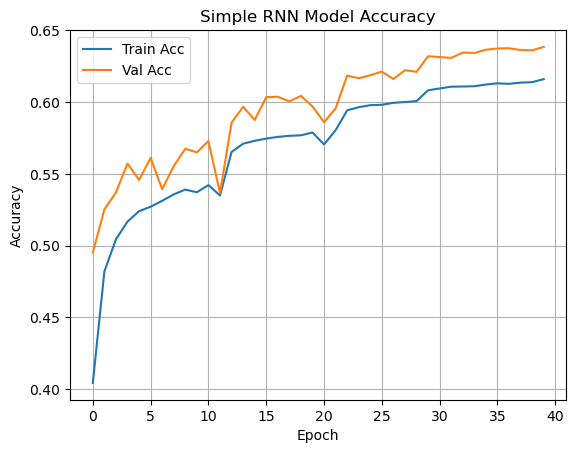

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Simple RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


10368/10368 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step


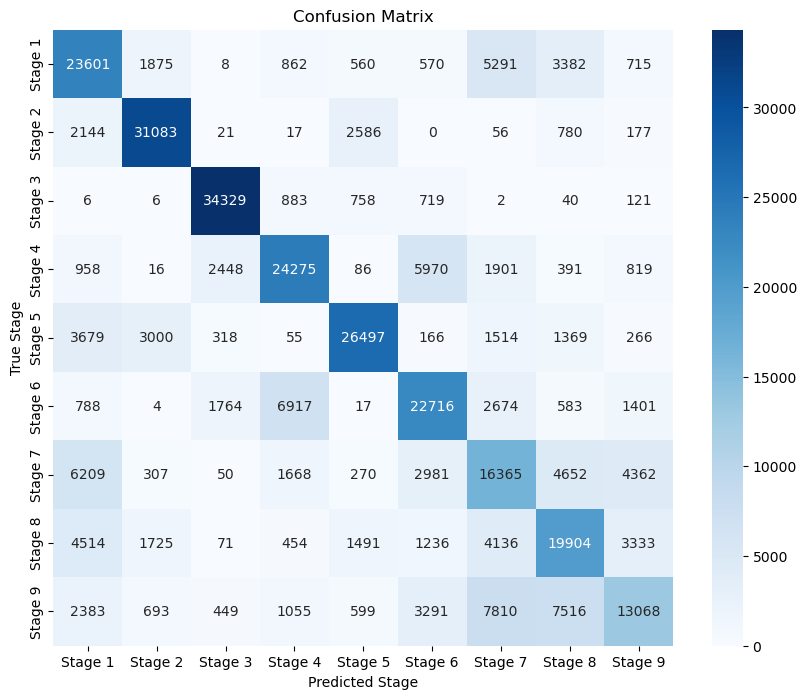

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Run predictions on your test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize it as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Stage {i}' for i in range(1, 10)],
            yticklabels=[f'Stage {i}' for i in range(1, 10)])
plt.xlabel('Predicted Stage')
plt.ylabel('True Stage')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes, target_names=[f'Stage {i}' for i in range(1, 10)]))


              precision    recall  f1-score   support

     Stage 1       0.53      0.64      0.58     36864
     Stage 2       0.80      0.84      0.82     36864
     Stage 3       0.87      0.93      0.90     36864
     Stage 4       0.67      0.66      0.66     36864
     Stage 5       0.81      0.72      0.76     36864
     Stage 6       0.60      0.62      0.61     36864
     Stage 7       0.41      0.44      0.43     36864
     Stage 8       0.52      0.54      0.53     36864
     Stage 9       0.54      0.35      0.43     36864

    accuracy                           0.64    331776
   macro avg       0.64      0.64      0.64    331776
weighted avg       0.64      0.64      0.64    331776



In [27]:
# Save model in HDF5 format
model.save("simpleRNN_fault_model.h5")


In [35]:
history = model.fit(X_train, y_train,
    epochs=1, # Increased epochs
    batch_size=64,
    validation_data=(X_test, y_test),)


# Save history
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


Epoch 1/40
 6062/20736 ━━━━━━━━━━━━━━━━━━━━ 1:40 7ms/step - accuracy: 0.6162 - loss: 0.9603

KeyboardInterrupt: 